In [1]:
import pandas as pd
import panel as pn
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
import seaborn as sns

pn.extension('tabulator')

import hvplot.pandas

In [2]:
files = ['PrimeLands.xlsx']

In [3]:
df = pd.DataFrame()
for file in files:
     if file.endswith('.xlsx'):
         df = df.append(pd.read_excel(file, sheet_name="posts"), ignore_index=False) 
df.head()



/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_49071/2132965398.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_excel(file, sheet_name="posts"), ignore_index=False)


,post_id,company,created_time,updated_time,message,shares_count,comments_count,reactions_count,like_count,love_count,haha_count,wow_count,sad_count,angry_count
0,135205517289_10159103803887290,Prime Lands,2021-01-29T11:53:06+0000,2021-02-16T03:42:05+0000,The Chance to Live in an Urban yet a Green and...,22.0,160,2316,2284,25,4,2,0,1
1,135205517289_10159096316887290,Prime Lands,2021-01-27T12:18:50+0000,2021-02-17T09:59:10+0000,Commercial & Residential Land Blocks in Malabe...,18.0,93,3370,3313,48,4,1,4,0
2,135205517289_10159096089642290,Prime Lands,2021-01-27T10:29:32+0000,2021-01-27T10:29:32+0000,NaN,NaN,0,14,13,1,0,0,0,0
3,135205517289_10159095708172290,Prime Lands,2021-01-27T07:49:20+0000,2021-01-28T04:40:42+0000,කුලියාපිටිය නගරයට කි.මි 2 යි ලබු යාය හන්දියෙන්...,14.0,4,2170,2129,30,8,2,1,0
4,135205517289_10159092490617290,Prime Lands,2021-01-26T12:21:13+0000,2021-02-08T03:12:28+0000,මැදවච්චිය නගරයෙන් සින්නක්කර ඔප්පු සහිත අගනා බි...,17.0,37,1247,1206,25,11,2,2,1


In [4]:

df['shares_count'] = df['shares_count'].replace(np.nan, 0)
df['comments_count'] = df['comments_count'].replace(np.nan, 0)
df['reactions_count'] = df['reactions_count'].replace(np.nan, 0)
df['like_count'] = df['like_count'].replace(np.nan, 0)
df['love_count'] = df['love_count'].replace(np.nan, 0)
df['haha_count'] = df['haha_count'].replace(np.nan, 0)
df['wow_count'] = df['wow_count'].replace(np.nan, 0)
df['sad_count'] = df['sad_count'].replace(np.nan, 0)
df['angry_count'] = df['angry_count'].replace(np.nan, 0)

df['created_time'] = pd.to_datetime(df['created_time'])
df['updated_time'] = pd.to_datetime(df['updated_time'])

df.sort_values(by='created_time', inplace=True)

df.head()



,post_id,company,created_time,updated_time,message,shares_count,comments_count,reactions_count,like_count,love_count,haha_count,wow_count,sad_count,angry_count
44,135205517289_10159034135507290,Prime Lands,2021-01-05 07:07:10+00:00,2021-03-14 10:30:03+00:00,"#NewProject වලහන්දුව, ගාල්ල අගනා බිම් කොටසක හි...",21.0,92,1880,1847,26,4,3,0,0
43,135205517289_10159036242137290,Prime Lands,2021-01-06 04:18:05+00:00,2021-08-29 12:19:55+00:00,"මත්තේගොඩ, කොට්ටාව සුඛොපබොගි නිවාස ඔබේ සිහින නි...",22.0,92,2049,2004,43,2,0,0,0
42,135205517289_10159036269747290,Prime Lands,2021-01-06 04:47:37+00:00,2022-05-20 16:03:15+00:00,#හොඳආයෝජනයක් ගම්පහ නගරයෙන් නවතම සුඛෝපභොගි නිවා...,157.0,422,4022,3919,77,8,15,1,2
41,135205517289_10159036535187290,Prime Lands,2021-01-06 08:49:29+00:00,2021-01-17 11:33:11+00:00,"Introducing Prime Villas - Dalugama, Kelaniya....",142.0,41,2415,2376,28,3,7,0,1
40,135205517289_10159036542617290,Prime Lands,2021-01-06 08:57:36+00:00,2021-02-05 05:13:17+00:00,ඔබගේ සියලු අවශ්‍යතා හඳුනාගෙන කඩවත නගරයට සහ අධි...,20.0,161,1456,1435,18,1,2,0,0


In [5]:
average_share_count = df["shares_count"].sum()/len(df.index)
print(f'average share count: {average_share_count}')

average_comments_count = df["comments_count"].sum()/len(df.index)
print(f'average comments count: {average_comments_count}')

average_reactions_count = df["reactions_count"].sum()/len(df.index)
print(f'average reactions count: {average_reactions_count}')

average share count: 32.663922155688624
average comments count: 57.69760479041916
average reactions count: 1277.9416167664672


<AxesSubplot:xlabel='created_time'>

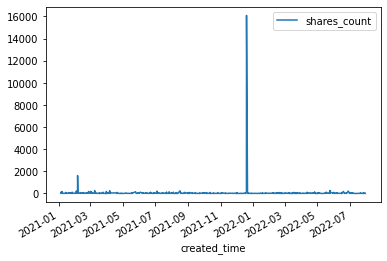

In [6]:
df.reset_index().plot(x ='created_time', y='shares_count', kind = 'line')

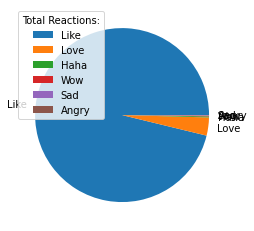

In [7]:
reactions_count =  df['like_count'].sum()
like_count = df['like_count'].sum()
love_count = df['love_count'].sum()
haha_count = df['haha_count'].sum()
wow_count = df['wow_count'].sum()
sad_count = df['sad_count'].sum()
angry_count = df['angry_count'].sum()

y = np.array([like_count, love_count, haha_count, wow_count, sad_count,angry_count])
mylabels = ["Like", "Love", "Haha", "Wow","Sad", "Angry"]

plt.pie(y, labels = mylabels)
plt.legend(title = "Total Reactions:")
plt.show() 




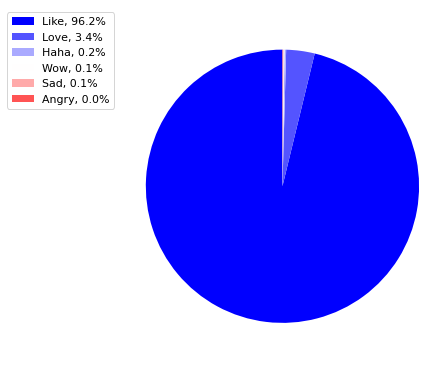

In [8]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(y)) for i in range(len(y))])

_, _ = ax1.pie(y, startangle=90)

ax1.axis('equal')

total = sum(y)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(mylabels, y)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()

(0.0, 5.0)

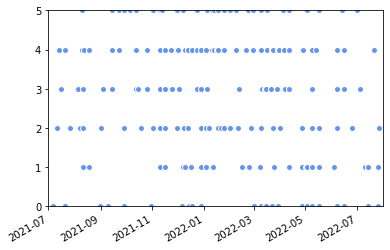

In [9]:
x = df['created_time']
y = df['shares_count']

fig, ax = plt.subplots()
ax.plot_date(x, y, markerfacecolor='CornflowerBlue', markeredgecolor='white')
fig.autofmt_xdate()
ax.set_xlim([dt.date(2021, 7, 1), dt.date(2022, 8, 1)])
ax.set_ylim([0, 5])

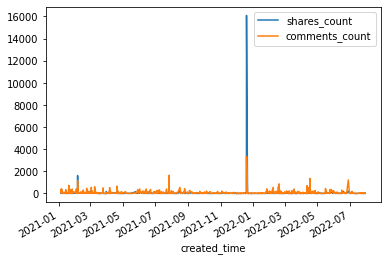

In [10]:
df["created_time"] = pd.to_datetime(df['created_time'])
df.plot(x="created_time", y=["shares_count", "comments_count"])
plt.show()

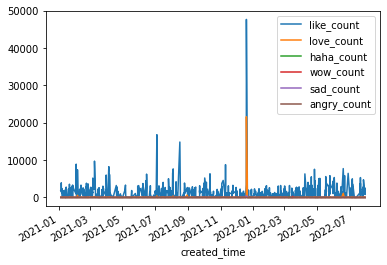

In [11]:
df["created_time"] = pd.to_datetime(df['created_time'])
df.plot(x="created_time", y=["like_count", "love_count", "haha_count", "wow_count", "sad_count","angry_count"])
plt.show()

In [12]:
df_groupby_m_y = df.groupby(df['created_time'].dt.to_period('M')).sum()
df_groupby_m_y


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,shares_count,comments_count,reactions_count,like_count,love_count,haha_count,wow_count,sad_count,angry_count
created_time,,,,,,,,,
2021-01,1690.0,5179,70922,69334,1308,130,95,20,35
2021-02,3386.0,5306,91200,88700,2086,179,179,33,23
2021-03,2079.0,4230,108023,105388,2255,168,111,57,44
2021-04,1127.0,3180,47926,46491,1197,117,76,22,23
2021-05,535.0,1135,19167,18486,606,39,20,12,4
2021-06,1407.0,4600,62483,60705,1504,127,70,32,45
2021-07,1809.0,6857,85769,83282,2120,178,96,43,50
2021-08,1688.0,4242,104203,100501,3246,189,109,81,77
2021-09,954.0,2053,70039,68325,1470,127,44,29,44


<AxesSubplot:xlabel='created_time'>

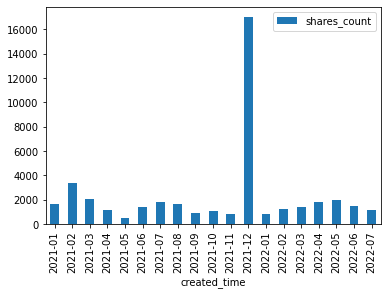

In [13]:
df_groupby_m_y.reset_index().plot(x ='created_time', y='shares_count', kind = 'bar')

<AxesSubplot:xlabel='created_time'>

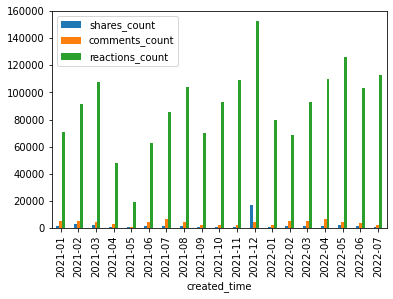

In [14]:
df_groupby_m_y.reset_index().plot(
    x="created_time", y=["shares_count", "comments_count", "reactions_count"], kind="bar"
)


<AxesSubplot:xlabel='created_time'>

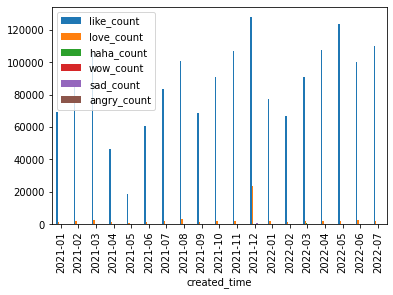

In [15]:
df_groupby_m_y.reset_index().plot(
    x="created_time", y=["like_count", "love_count", "haha_count", "wow_count", "sad_count","angry_count"], kind="bar"
)


In [16]:
df['created_time'].groupby([df.created_time.dt.year, df.created_time.dt.month]).agg('count')

created_time  created_time
2021          1                45
              2                50
              3                73
              4                48
              5                18
              6                53
              7                71
              8                67
              9                57
              10               71
              11               90
              12               92
2022          1                81
              2                86
              3               100
              4                98
              5                89
              6                65
              7                82
Name: created_time, dtype: int64

In [17]:
df_median_m_y = df.groupby(pd.Grouper(key='created_time',freq='M')).median()
df_median_m_y



,shares_count,comments_count,reactions_count,like_count,love_count,haha_count,wow_count,sad_count,angry_count
created_time,,,,,,,,,
2021-01-31 00:00:00+00:00,22.0,53.0,1608.0,1587.0,25.0,2.0,1.0,0.0,0.0
2021-02-28 00:00:00+00:00,24.0,64.5,1410.5,1384.0,26.0,2.0,1.0,0.0,0.0
2021-03-31 00:00:00+00:00,15.0,23.0,1384.0,1329.0,26.0,2.0,1.0,0.0,0.0
2021-04-30 00:00:00+00:00,11.0,23.0,255.5,240.0,11.5,1.0,0.0,0.0,0.0
2021-05-31 00:00:00+00:00,17.0,38.5,383.5,368.0,15.5,0.5,0.0,0.0,0.0
2021-06-30 00:00:00+00:00,18.0,45.0,480.0,460.0,18.0,2.0,1.0,0.0,0.0
2021-07-31 00:00:00+00:00,15.0,51.0,313.0,306.0,10.0,1.0,0.0,0.0,0.0
2021-08-31 00:00:00+00:00,15.0,35.0,1044.0,1002.0,22.0,1.0,0.0,0.0,0.0
2021-09-30 00:00:00+00:00,12.0,18.0,1360.0,1323.0,24.0,1.0,0.0,0.0,0.0


In [18]:
average_share_count = df["shares_count"].sum()/len(df.index)
print(f'average share count: {average_share_count}')

average_comments_count = df["comments_count"].sum()/len(df.index)
print(f'average comments count: {average_comments_count}')

average_reactions_count = df["reactions_count"].sum()/len(df.index)
print(f'average reactions count: {average_reactions_count}')

average share count: 32.663922155688624
average comments count: 57.69760479041916
average reactions count: 1277.9416167664672


In [19]:
df.groupby(pd.Grouper(key='created_time',freq='M')).apply(lambda x: x['shares_count'].sum()/len(x))

created_time
2021-01-31 00:00:00+00:00     37.555556
2021-02-28 00:00:00+00:00     67.720000
2021-03-31 00:00:00+00:00     28.479452
2021-04-30 00:00:00+00:00     23.479167
2021-05-31 00:00:00+00:00     29.722222
2021-06-30 00:00:00+00:00     26.547170
2021-07-31 00:00:00+00:00     25.478873
2021-08-31 00:00:00+00:00     25.194030
2021-09-30 00:00:00+00:00     16.736842
2021-10-31 00:00:00+00:00     15.267606
2021-11-30 00:00:00+00:00      9.655556
2021-12-31 00:00:00+00:00    184.978261
2022-01-31 00:00:00+00:00     10.049383
2022-02-28 00:00:00+00:00     14.802326
2022-03-31 00:00:00+00:00     14.010000
2022-04-30 00:00:00+00:00     18.693878
2022-05-31 00:00:00+00:00     22.629213
2022-06-30 00:00:00+00:00     22.938462
2022-07-31 00:00:00+00:00     14.243902
Freq: M, dtype: float64

In [20]:
df_average_monthly_stats = df.groupby(df['created_time'].dt.to_period('M')).mean().round(2).reset_index()
df_average_monthly_stats

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,created_time,shares_count,comments_count,reactions_count,like_count,love_count,haha_count,wow_count,sad_count,angry_count
0,2021-01,37.56,115.09,1576.04,1540.76,29.07,2.89,2.11,0.44,0.78
1,2021-02,67.72,106.12,1824.00,1774.00,41.72,3.58,3.58,0.66,0.46
2,2021-03,28.48,57.95,1479.77,1443.67,30.89,2.30,1.52,0.78,0.60
3,2021-04,23.48,66.25,998.46,968.56,24.94,2.44,1.58,0.46,0.48
4,2021-05,29.72,63.06,1064.83,1027.00,33.67,2.17,1.11,0.67,0.22
5,2021-06,26.55,86.79,1178.92,1145.38,28.38,2.40,1.32,0.60,0.85
6,2021-07,25.48,96.58,1208.01,1172.99,29.86,2.51,1.35,0.61,0.70
7,2021-08,25.19,63.31,1555.27,1500.01,48.45,2.82,1.63,1.21,1.15
8,2021-09,16.74,36.02,1228.75,1198.68,25.79,2.23,0.77,0.51,0.77
9,2021-10,15.27,32.80,1308.92,1277.86,26.92,2.38,0.70,0.48,0.58


<AxesSubplot:xlabel='created_time'>

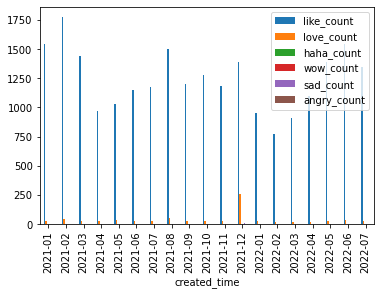

In [21]:
df_average_monthly_stats.reset_index().plot(
    x="created_time", y=["like_count", "love_count", "haha_count", "wow_count", "sad_count","angry_count"], kind="bar"
)